In [2]:
import os
import pandas as pd
import numpy as np

from sklearn import tree # za vizualizaciju stabla

from sklearn.tree import DecisionTreeClassifier # Decision Tree model
from sklearn.model_selection import train_test_split # podela na train/test

from sklearn.metrics import classification_report, confusion_matrix #za racunanje metrika

import matplotlib.pyplot as plt

In [3]:
os.listdir()

['.git',
 '.gitignore',
 'decision_tree.ipynb',
 'mini_decision_tree_dataset.csv',
 'README.md']

In [4]:
data=pd.read_csv(os.path.join(os.getcwd(),'mini_decision_tree_dataset.csv'))
data.head()

,crd_gap,cred_yoy,hp_yoy,warning
0,-1.0,2.0,1.0,0
1,2.5,7.5,6.0,1
2,4.2,11.0,10.0,1
3,0.5,4.0,2.0,0
4,1.2,5.5,3.5,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   crd_gap   8 non-null      float64
 1   cred_yoy  8 non-null      float64
 2   hp_yoy    8 non-null      float64
 3   warning   8 non-null      int64  
dtypes: float64(3), int64(1)
memory usage: 388.0 bytes


In [6]:
data.describe()

,crd_gap,cred_yoy,hp_yoy,warning
count,8.000000,8.00000,8.000000,8.000000
mean,1.587500,5.75000,4.562500,0.500000
std,1.893928,3.40168,3.277603,0.534522
min,-1.000000,1.00000,1.000000,0.000000
25%,0.250000,3.50000,1.800000,0.000000
50%,1.600000,5.75000,4.150000,0.500000
75%,2.825000,7.87500,6.500000,1.000000
max,4.200000,11.00000,10.000000,1.000000


In [7]:
data.isnull().sum()

crd_gap     0
cred_yoy    0
hp_yoy      0
warning     0
dtype: int64

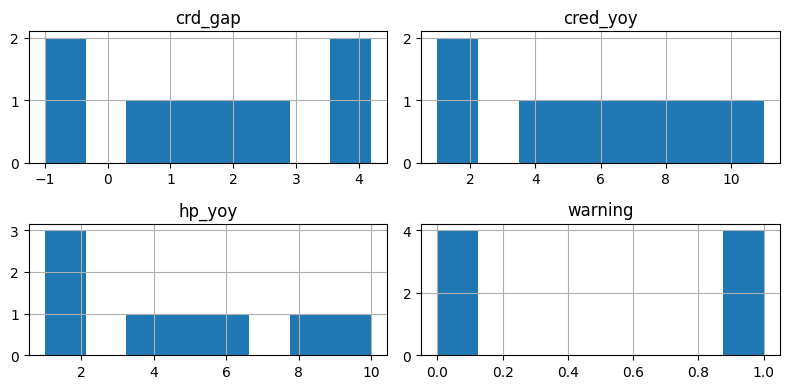

In [8]:
data.hist(figsize=(8,4), bins=8)
plt.tight_layout()
plt.show()

In [9]:
data.corr()

,crd_gap,cred_yoy,hp_yoy,warning
crd_gap,1.000000,0.980647,0.981668,0.867856
cred_yoy,0.980647,1.000000,0.978596,0.824958
hp_yoy,0.981668,0.978596,1.000000,0.860265
warning,0.867856,0.824958,0.860265,1.000000


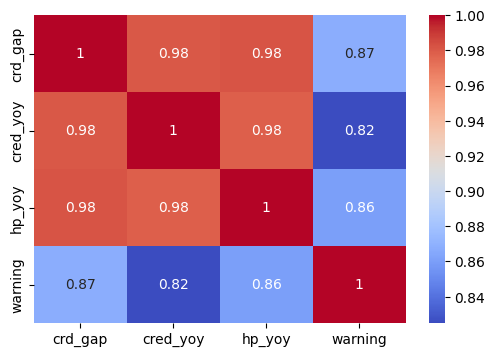

In [10]:
import seaborn as sns 
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

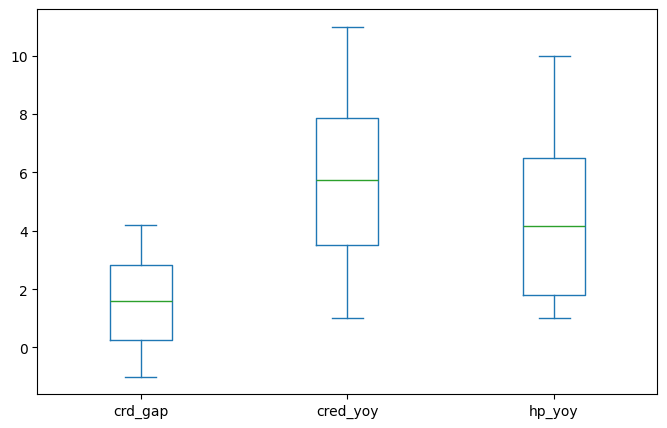

In [11]:
data[['crd_gap','cred_yoy','hp_yoy']].plot(kind='box',figsize=(8,5)) #Boxplot (za detekciju outlier-a)
plt.show()

In [12]:
X=data[['crd_gap','cred_yoy','hp_yoy']]
y=data['warning']

In [13]:
X

,crd_gap,cred_yoy,hp_yoy
0,-1.0,2.0,1.0
1,2.5,7.5,6.0
2,4.2,11.0,10.0
3,0.5,4.0,2.0
4,1.2,5.5,3.5
5,3.8,9.0,8.0
6,-0.5,1.0,1.2
7,2.0,6.0,4.8


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#random_state kontroliše generator slučajnih brojeva.

#✔️ Ako ga postaviš (npr. 42), podela je uvek ista

#To omogućava reproduktivnost: svaki put kada pokreneš notebook → dobiješ ISTI train i test set

#ako ga ne staviš → svaki put dobiješ drugačiju podelu ako drugima šalješ kod → oni vide iste rezultate kao ti

#To je jako bitno za analizu i objašnjavanje.

In [15]:
X_train.shape

(5, 3)

In [16]:
y_train.shape

(5,)

In [17]:
#Kreiranje modela

dt_model=DecisionTreeClassifier(
    max_depth=3, #koliko je duboko drvo, drvo može imati najviše 3 nivoa pitanja
    min_samples_leaf=1, # minimalan broj posmatranja u listu, list može imati 1 posmatranje (na ovako malom datasetu je ok)
    random_state=42
)

In [18]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [19]:
y_pred=dt_model.predict(X_test)

print("y_test:", list(y_test.values))
print("y_pred:", list(y_pred))

y_test: [np.int64(1), np.int64(1), np.int64(0)]
y_pred: [np.int64(1), np.int64(1), np.int64(0)]


In [20]:
print(confusion_matrix(y_test,y_pred))

[[1 0]
 [0 2]]


In [21]:
print(classification_report(y_test, y_pred, digits=1))

              precision    recall  f1-score   support

           0        1.0       1.0       1.0         1
           1        1.0       1.0       1.0         2

    accuracy                            1.0         3
   macro avg        1.0       1.0       1.0         3
weighted avg        1.0       1.0       1.0         3



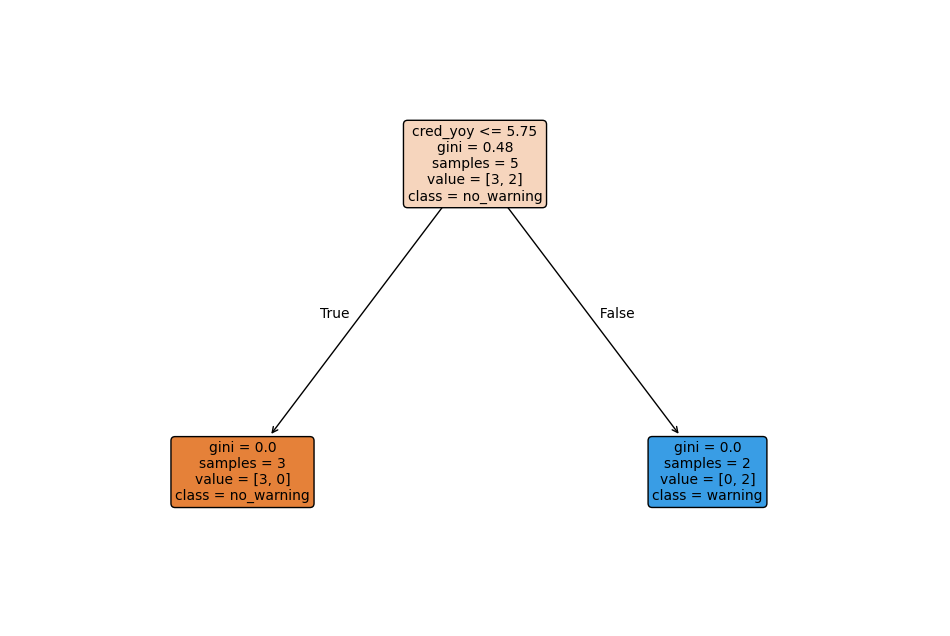

In [22]:
plt.figure(figsize=(12,8))
tree.plot_tree(dt_model, 
               feature_names=X.columns, 
               class_names=['no_warning','warning'], 
               filled=True, 
               rounded=True,
               fontsize=10)
plt.show()

In [23]:
importance = pd.Series(
    dt_model.feature_importances_,
    index=['crd_gap','cred_yoy','hp_yoy']
)
importance

crd_gap     0.0
cred_yoy    1.0
hp_yoy      0.0
dtype: float64

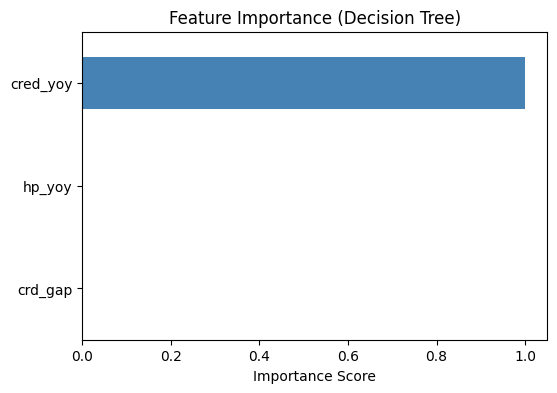

In [25]:
plt.figure(figsize=(6,4))
importance.sort_values().plot(kind='barh', color='steelblue')
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.show()